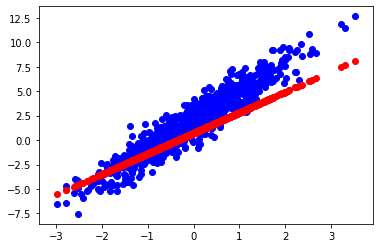

Loss : 
3.2110105
 0: W=1.08 b=0.83, Loss=5.67289
 1: W=1.45 b=1.05, Loss=4.00554
 2: W=1.74 b=1.23, Loss=2.92753
 3: W=1.98 b=1.38, Loss=2.23057
 4: W=2.17 b=1.49, Loss=1.77995
 5: W=2.33 b=1.59, Loss=1.48861
 6: W=2.45 b=1.66, Loss=1.30025
 7: W=2.55 b=1.72, Loss=1.17846
 8: W=2.63 b=1.77, Loss=1.09972
 9: W=2.69 b=1.81, Loss=1.04881
10: W=2.74 b=1.84, Loss=1.01589
11: W=2.79 b=1.87, Loss=0.99461
12: W=2.82 b=1.89, Loss=0.98085
13: W=2.85 b=1.91, Loss=0.97196
14: W=2.87 b=1.92, Loss=0.96620
15: W=2.88 b=1.93, Loss=0.96248
16: W=2.90 b=1.94, Loss=0.96008
17: W=2.91 b=1.95, Loss=0.95853
18: W=2.92 b=1.95, Loss=0.95752
19: W=2.93 b=1.96, Loss=0.95687
20: W=2.93 b=1.96, Loss=0.95645
21: W=2.94 b=1.96, Loss=0.95618
22: W=2.94 b=1.96, Loss=0.95600
23: W=2.94 b=1.97, Loss=0.95589
24: W=2.94 b=1.97, Loss=0.95582
25: W=2.95 b=1.97, Loss=0.95577
26: W=2.95 b=1.97, Loss=0.95574
27: W=2.95 b=1.97, Loss=0.95572
28: W=2.95 b=1.97, Loss=0.95570
29: W=2.95 b=1.97, Loss=0.95570


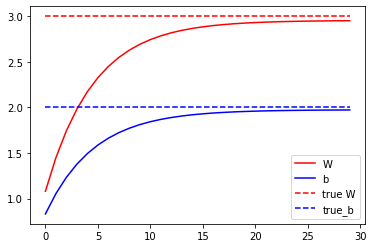

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

class Model(object):
  def __init__(self):
    # W, b is random num
    self.W = tf.Variable(tf.random.normal([1]))
    self.b = tf.Variable(tf.random.normal([1]))

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

#assert model(3.0).numpy() == 15.0

def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

# Graph - Current data
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Loss : '),
print(loss(model(inputs), outputs).numpy())

# Gradient Descent - We can use Optimize but just use train function
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

model = Model()

# Save change of W and b
Ws, bs = [], []

# ephochs = loop num
epochs = range(30)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('%2d: W=%1.2f b=%1.2f, Loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Make Graph
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()